<a href="https://colab.research.google.com/github/maawoo/nithecs_microschool_xarray_eo/blob/main/01_intro_to_xarray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NITheCS Micro-school: 'Introduction to Xarray – Empowering Multidimensional Data Analysis'

Date: March 14, 2025

Author: Marco Wolsza

Repository: https://github.com/maawoo/nithecs_microschool_xarray_eo

Recording: ...

Reach out to me on [Bluesky](https://bsky.app/profile/maawoo.bsky.social), [Mastodon](https://fosstodon.org/@maawoo)  or [LinkedIn](www.linkedin.com/in/maawoo)

Related NITheCS Micro-schools: [Introduction to NumPy](https://www.youtube.com/watch?v=XBd4b9Oi80A&list=PLE9Qrf4CJnRF59_QFg2OI0XWvO3KnievK&index=13), [The Power of Pandas](https://www.youtube.com/watch?v=X-nTp0EbcSA&list=PLE9Qrf4CJnRF59_QFg2OI0XWvO3KnievK&index=10), [Matplotlib Introduction](https://www.youtube.com/watch?v=dgYxTMKbsLs&list=PLE9Qrf4CJnRF59_QFg2OI0XWvO3KnievK&index=13)

## 1 Introduction

- **What is [Xarray](https://xarray.dev)?** "Xarray makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun!"
- **Key advantages:**
  - Extends [NumPy](https://numpy.org/)/[Pandas](https://pandas.pydata.org/) with labeled dimensions, coordinates and attributes
  - Enables efficient operations on large datasets (with [Dask](https://www.dask.org/) integration)
  - Domain agnostic. Useful in climate science, geospatial analysis, satellite imagery, scientific simulations, and more.
  - Rich ecosystem. E.g. see [Xarray related projects](https://docs.xarray.dev/en/stable/ecosystem.html), [xarray-contrib](https://github.com/xarray-contrib) and [Pangeo](https://www.pangeo.io/)

- **Xarray Documentation:** https://docs.xarray.dev/en/stable/index.html

- [**Why Xarray?**](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html):
  - Multi-dimensional arrays (a.k.a. N-dimensional arrays, ND arrays, "tensors") are an essential part of computational science.
  - NumPy provides the fundamental data structure and API for working with raw ND arrays.
  - Xarray builds upon this and makes such arrays much more manageable.

In [2]:
import numpy as np
import pandas as pd
import xarray as xr
print(xr.__version__)

2025.1.2


A current version of Xarray is already installed in the default environment of Colab!

## 2 Core Data Structures

Let's start with a raw 3-dimensional numpy array:

In [24]:
ds_np = np.random.randint(low=0, high=42, size=(1460, 50, 50))
ds_np

array([[[ 8, 11, 26, ..., 37, 13, 36],
        [38,  0, 12, ..., 21, 29,  0],
        [40, 29, 10, ..., 17, 33, 36],
        ...,
        [27, 28, 41, ..., 36,  6, 27],
        [22, 39, 34, ..., 13, 30, 39],
        [ 3, 30, 27, ..., 24, 40, 33]],

       [[ 3, 30,  3, ...,  3,  9,  4],
        [34, 14, 38, ...,  8, 19, 21],
        [17, 33, 27, ..., 24, 11, 30],
        ...,
        [34,  8, 12, ..., 25, 24, 24],
        [17, 23,  2, ..., 38, 24, 34],
        [ 6, 31, 23, ...,  5,  1, 32]],

       [[19, 32, 41, ..., 15, 36, 18],
        [22, 25, 36, ..., 24, 32,  4],
        [27, 30, 36, ..., 41, 17, 10],
        ...,
        [38, 41, 40, ...,  0,  6, 12],
        [15, 12, 11, ..., 24,  2,  4],
        [16, 39, 22, ...,  0, 22, 30]],

       ...,

       [[15, 32, 17, ..., 21,  4,  8],
        [10, 24, 39, ...,  5, 31, 25],
        [32, 10,  3, ...,  9, 18, 41],
        ...,
        [35, 41, 21, ...,  4, 37, 11],
        [10,  1,  4, ..., 20, 20, 11],
        [31, 34, 23, ...,  6,  6

In [25]:
ds_np.shape

(1460, 50, 50)

Let's assume the values are air temperature measurements and the dimensions correspond to: `time`, `latitude`, and `longitude`.

Using NumPy we can select the 100th time step using positional indexing:

In [26]:
ds_np[100, :, :]

array([[ 4, 37, 38, ..., 35, 17, 15],
       [17, 26,  1, ...,  5, 18,  7],
       [31, 22, 15, ..., 39,  7, 29],
       ...,
       [24,  6, 19, ..., 37, 22,  5],
       [ 2,  7, 20, ...,  6, 19, 21],
       [23, 32,  6, ..., 14, 15, 36]])

And we could calculate the mean value for each lat/lon grid cell like this:

In [125]:
ds_np.mean(axis=1)
#ds_np.mean(axis=1).shape

array([[18.5 , 19.56, 19.76, ..., 18.04, 21.62, 19.9 ],
       [19.4 , 23.54, 20.86, ..., 19.02, 20.1 , 21.02],
       [19.42, 18.78, 20.86, ..., 20.08, 22.98, 21.04],
       ...,
       [23.06, 17.54, 17.6 , ..., 20.18, 17.98, 18.46],
       [18.94, 20.76, 20.42, ..., 22.74, 20.44, 21.74],
       [20.  , 20.64, 21.46, ..., 19.14, 21.5 , 15.62]])

...or did we? Hard to tell if the output is correct.

Imagine creating a complicated workflow based on several multidimensional arrays. It would be error-prone and difficult to understand (especially when you included barlely any comments in your code and come back weeks or months later... 😉).

A real-world air temperature dataset can be loaded directly from Xarray's tutorial datasets:

In [28]:
ds_xr = xr.tutorial.load_dataset("air_temperature")
ds_xr

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Xarray's core data structures:
- **DataArray:** N-dimensional array with labels (like a labeled NumPy ndarray)
- **Dataset:** Collection of DataArrays that share dimensions (like a dict of DataArrays)
- DataTree: Very recently added and out of scope of this short introduction.

And expanding on these core data structures: **dimensions, coordinates, and attributes** are the labeling system that makes Xarray powerful.

You can read more about Xarray's data structures and terminology [here](https://docs.xarray.dev/en/stable/user-guide/data-structures.html#) and [here](https://docs.xarray.dev/en/stable/user-guide/terminology.html#) in the documentation.

You can directly access the DataArray named `air`, which is contained in the Dataset. Because we use this DataArray a lot in the following examples, we assign it to a new variable here.

In [29]:
air = ds_xr.air
air

# or using dictionary-syntax:
# ds_xr['air']

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
...
        ...,
        [294.79, 295.29, 297.49, ..., 295.49, 295.39, 294.69],
        [296.79, 297.89, 298.29, ..., 295.49, 295.49, 294.79],
        [298.19, 299.19, 298.79, ..., 296.09, 295.79, 295.79]],

       [[245.79, 244.79, 243.49, ..., 243.29, 243.99, 244.79],
        [249.89, 249.29, 248.49, ..., 241.29, 242.49, 244.29],
        [262.39, 261.79, 261.29, ..., 240.49, 243.09, 246.89],
        ...,
        [293.69, 293.89, 295.39, ..., 295.09, 294.69, 294.29],
        [296.29, 297.19, 297.59, ..., 295.29, 295.09, 294.39],
        [297.79, 298.39, 298.49, ..., 295.69, 295.49, 295.19]],

       [[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
        [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
        [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

And we can also directly access the underlying NumPy array that is contained in the DataArray using the [`.data`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.data.html#xarray.DataArray.data):

In [123]:
air.data
#type(air.data)

array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
        [295

### 2-1 Bonus: Constructing the air temperature dataset manually

We first create the DataArray using a similar numpy array of random values to the one we created in the beginning of this section. The `lat` and `lon` dimensions can be created as evenly spaced 1-dimensional numpy arrays and the `time` dimension as a Pandas index.

In [31]:
n_lat = 25
n_lon = 53
n_time = 2920

air_da = xr.DataArray(
    data=np.random.randint(low=0, high=42, size=(n_lat, n_lon, n_time)),
    dims=("lat", "lon", "time"),
    coords={
        "lat": np.linspace(start=75, stop=15, num=n_lat),
        "lon": np.linspace(start=200, stop=330, num=n_lon),
        "time": pd.date_range("2013-01-01", freq='6h', periods=n_time),
        },
    attrs={"description": "Random air temperature data"}
)

We can then wrap the DataArray in a Dataset. The added benefit of this Dataset is that it could contain other relevant DataArrays with shared dimensions, e.g. precipitation.

In [33]:
ds_xr_man = xr.Dataset(
    data_vars={
        "air": air_da,
        #"precipitation": xr.DataArray(...)
        },
    attrs={"hello": "world"}
)

ds_xr_man

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float64 200B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float64 424B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (lat, lon, time) int64 31MB 26 22 18 21 12 29 ... 36 11 5 10 39 35
Attributes:
    hello:    world

## 3 Data Selection and Indexing

You can read more about indexing and selecting data [here](https://docs.xarray.dev/en/stable/user-guide/indexing.html) in the documentation.

In [34]:
air.dims

('time', 'lat', 'lon')

Remember how we used positional indexing on the NumPy array in the beginning? This also works here:

In [35]:
air[100, :, :]

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[248.39, 249.2 , 249.5 , ..., 243.5 , 243.7 , 244.2 ],
       [250.6 , 251.39, 251.7 , ..., 242.5 , 242.8 , 244.  ],
       [249.1 , 249.6 , 249.8 , ..., 239.8 , 242.  , 245.3 ],
       ...,
       [297.4 , 296.5 , 296.  , ..., 293.5 , 293.  , 292.7 ],
       [297.29, 297.1 , 296.7 , ..., 294.  , 293.5 , 293.2 ],
       [297.29, 297.4 , 297.2 , ..., 294.79, 294.5 , 294.5 ]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-26
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Because the `time`-dimension of our Dataset/DataArray is named, we can explicitly address this dimension by its name and thereby create much clearer code. For example using the [`isel`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.isel.html#xarray.DataArray.isel) ("integer select") we can also select the 100th time step:

In [36]:
air.isel(time=100)

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[248.39, 249.2 , 249.5 , ..., 243.5 , 243.7 , 244.2 ],
       [250.6 , 251.39, 251.7 , ..., 242.5 , 242.8 , 244.  ],
       [249.1 , 249.6 , 249.8 , ..., 239.8 , 242.  , 245.3 ],
       ...,
       [297.4 , 296.5 , 296.  , ..., 293.5 , 293.  , 292.7 ],
       [297.29, 297.1 , 296.7 , ..., 294.  , 293.5 , 293.2 ],
       [297.29, 297.4 , 297.2 , ..., 294.79, 294.5 , 294.5 ]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-26
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Or using the [`sel`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sel.html#xarray.DataArray.sel) ("select") we can select a specific label of the `time`-dimension:

In [37]:
air.sel(time="2013-01-26")

<xarray.DataArray 'air' (time: 4, lat: 25, lon: 53)> Size: 42kB
array([[[248.39, 249.2 , 249.5 , ..., 243.5 , 243.7 , 244.2 ],
        [250.6 , 251.39, 251.7 , ..., 242.5 , 242.8 , 244.  ],
        [249.1 , 249.6 , 249.8 , ..., 239.8 , 242.  , 245.3 ],
        ...,
        [297.4 , 296.5 , 296.  , ..., 293.5 , 293.  , 292.7 ],
        [297.29, 297.1 , 296.7 , ..., 294.  , 293.5 , 293.2 ],
        [297.29, 297.4 , 297.2 , ..., 294.79, 294.5 , 294.5 ]],

       [[248.39, 248.8 , 248.5 , ..., 240.2 , 241.  , 242.2 ],
        [250.1 , 250.6 , 250.3 , ..., 240.6 , 241.3 , 242.8 ],
        [247.6 , 248.1 , 248.2 , ..., 238.3 , 240.7 , 244.2 ],
        ...,
        [296.79, 295.9 , 295.5 , ..., 293.29, 293.2 , 292.79],
        [297.2 , 297.2 , 296.7 , ..., 293.5 , 293.7 , 293.5 ],
        [297.6 , 297.6 , 297.2 , ..., 294.5 , 294.2 , 294.4 ]],

       [[246.8 , 246.8 , 246.5 , ..., 237.39, 238.6 , 240.3 ],
        [249.7 , 249.2 , 248.2 , ..., 240.7 , 241.89, 244.1 ],
        [247.1 , 247.  , 246.8 , ..., 239.3 , 242.3 , 246.39],
        ...,
        [295.7 , 294.7 , 294.2 , ..., 293.5 , 292.79, 292.29],
        [296.4 , 296.29, 295.7 , ..., 293.79, 293.6 , 293.2 ],
        [297.4 , 297.4 , 296.9 , ..., 294.5 , 294.2 , 294.29]],

       [[245.6 , 246.  , 246.1 , ..., 234.7 , 235.8 , 237.5 ],
        [248.1 , 247.8 , 247.2 , ..., 237.6 , 239.  , 241.39],
        [245.  , 244.3 , 243.5 , ..., 239.7 , 242.8 , 246.6 ],
        ...,
        [295.7 , 294.6 , 294.29, ..., 293.7 , 293.29, 292.5 ],
        [296.5 , 296.4 , 295.9 , ..., 294.1 , 294.  , 293.79],
        [297.5 , 297.4 , 297.  , ..., 295.4 , 295.  , 295.2 ]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 32B 2013-01-26 ... 2013-01-26T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

This actually resulted in four time steps being found for the day `2013-01-26`. We can provide more detail (e.g., hour, minute, second) in order to select the 100th time step as we did above:

In [38]:
air.sel(time="2013-01-26T00:00:00") # this time format is called ISO 8601

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[248.39, 249.2 , 249.5 , ..., 243.5 , 243.7 , 244.2 ],
       [250.6 , 251.39, 251.7 , ..., 242.5 , 242.8 , 244.  ],
       [249.1 , 249.6 , 249.8 , ..., 239.8 , 242.  , 245.3 ],
       ...,
       [297.4 , 296.5 , 296.  , ..., 293.5 , 293.  , 292.7 ],
       [297.29, 297.1 , 296.7 , ..., 294.  , 293.5 , 293.2 ],
       [297.29, 297.4 , 297.2 , ..., 294.79, 294.5 , 294.5 ]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-26
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Another powerful way of selecting data is by a condition using the [`where`-method](https://docs.xarray.dev/en/stable/user-guide/indexing.html#masking-with-where). Values will be preserved at locations where this condition is True, otherwise they will be filled with another value (NA / [`np.nan`](https://numpy.org/doc/2.1/reference/constants.html#numpy.nan) by default):

In [39]:
air.where(air > 250)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [253.2 , 252.89, 252.1 , ...,    nan,    nan,    nan],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [256.2 , 255.5 , 254.2 , ...,    nan,    nan,    nan],
        ...,
...
        ...,
        [294.79, 295.29, 297.49, ..., 295.49, 295.39, 294.69],
        [296.79, 297.89, 298.29, ..., 295.49, 295.49, 294.79],
        [298.19, 299.19, 298.79, ..., 296.09, 295.79, 295.79]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [262.39, 261.79, 261.29, ...,    nan,    nan,    nan],
        ...,
        [293.69, 293.89, 295.39, ..., 295.09, 294.69, 294.29],
        [296.29, 297.19, 297.59, ..., 295.29, 295.09, 294.39],
        [297.79, 298.39, 298.49, ..., 295.69, 295.49, 295.19]],

       [[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [262.99, 262.19, 261.39, ...,    nan,    nan,    nan],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

This condition can also be much more complex, combining logic using comparison and bitwise [operators](https://www.w3schools.com/python/python_operators.asp) for example and even using other DataArrays/Datasets.

### 3-1 Bonus: Slicing & Datetime components

You can read more about datetime indexing and components [here](https://docs.xarray.dev/en/stable/user-guide/time-series.html#datetime-indexing) and [here](https://docs.xarray.dev/en/stable/user-guide/time-series.html#datetime-components) in the documentation.

Xarray's datetime indexing is quite powerful as it borrows from Pandas. For example, you can easily create a subset using datetime strings:

In [40]:
air.sel(time=slice('2013-06', '2013-09-14T08:12:34'))

<xarray.DataArray 'air' (time: 422, lat: 25, lon: 53)> Size: 4MB
array([[[273.1 , 273.2 , 273.1 , ..., 260.4 , 261.5 , 263.  ],
        [275.29, 275.  , 274.6 , ..., 258.  , 260.1 , 263.1 ],
        [274.1 , 272.7 , 272.  , ..., 258.9 , 261.4 , 264.9 ],
        ...,
        [299.5 , 299.  , 298.1 , ..., 297.6 , 297.1 , 296.29],
        [299.6 , 299.5 , 298.7 , ..., 297.7 , 297.4 , 296.5 ],
        [299.7 , 299.7 , 299.  , ..., 297.6 , 297.6 , 297.5 ]],

       [[271.1 , 271.29, 271.4 , ..., 257.2 , 258.7 , 260.7 ],
        [273.29, 273.29, 273.29, ..., 256.1 , 258.4 , 261.6 ],
        [273.1 , 271.9 , 271.2 , ..., 255.39, 258.79, 263.2 ],
        ...,
        [299.  , 298.1 , 297.4 , ..., 297.2 , 296.7 , 295.7 ],
        [299.29, 298.79, 298.  , ..., 297.1 , 297.  , 296.29],
        [299.2 , 299.  , 298.7 , ..., 297.1 , 297.1 , 297.4 ]],

       [[270.9 , 270.9 , 270.79, ..., 261.5 , 262.79, 264.29],
        [273.4 , 273.5 , 273.4 , ..., 259.6 , 261.79, 264.6 ],
        [270.4 , 268.9 , 268.  , ..., 260.29, 262.9 , 266.29],
        ...,
...
        ...,
        [298.29, 297.5 , 297.29, ..., 299.2 , 298.7 , 299.  ],
        [299.  , 298.6 , 298.  , ..., 299.2 , 299.2 , 299.4 ],
        [298.6 , 298.4 , 298.1 , ..., 300.1 , 299.9 , 299.9 ]],

       [[270.  , 269.6 , 269.2 , ..., 253.2 , 255.7 , 259.  ],
        [274.4 , 274.29, 274.1 , ..., 249.3 , 252.8 , 257.79],
        [276.5 , 276.  , 276.1 , ..., 246.3 , 251.1 , 257.6 ],
        ...,
        [298.6 , 298.7 , 298.9 , ..., 298.79, 298.6 , 298.6 ],
        [299.9 , 299.5 , 299.1 , ..., 299.1 , 299.1 , 298.79],
        [299.29, 299.1 , 299.1 , ..., 299.5 , 299.7 , 299.7 ]],

       [[269.1 , 268.9 , 268.79, ..., 252.2 , 255.3 , 258.5 ],
        [273.5 , 273.9 , 274.29, ..., 249.1 , 253.7 , 258.6 ],
        [275.6 , 275.4 , 275.79, ..., 245.6 , 251.8 , 258.5 ],
        ...,
        [299.2 , 299.  , 298.79, ..., 298.6 , 298.29, 298.1 ],
        [299.79, 299.6 , 299.1 , ..., 298.79, 298.9 , 298.5 ],
        [299.4 , 299.7 , 299.5 , ..., 299.  , 299.5 , 299.7 ]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 3kB 2013-06-01 ... 2013-09-14T06:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

As you can see, the datetime strings can even be in different formats. Note that indexing using a `slice` object is not exclusive to the time dimension. You could also slice the latitude and longitude dimensions.

Using the special `.dt` accessor, components of datetime objects can be quickly computed:

In [41]:
air.time.dt.hour

# air_temp_xr.time.dt.day
# air_temp_xr.time.dt.week
# air_temp_xr.time.dt.dayofweek
# ...

<xarray.DataArray 'hour' (time: 2920)> Size: 23kB
array([ 0,  6, 12, ...,  6, 12, 18])
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

This allows for powerful indexing. Our air temperature dataset is sampled in a 6 hour interval. Let's select only time steps that were sampled at 6 pm:

In [42]:
air.isel(time=(air.time.dt.hour == 18))

<xarray.DataArray 'air' (time: 730, lat: 25, lon: 53)> Size: 8MB
array([[[241.89, 241.8 , 241.8 , ..., 234.39, 235.5 , 237.6 ],
        [246.3 , 245.3 , 244.2 , ..., 230.89, 231.5 , 234.5 ],
        [256.6 , 254.7 , 252.1 , ..., 230.7 , 231.8 , 236.1 ],
        ...,
        [296.6 , 296.4 , 296.  , ..., 296.5 , 295.79, 295.29],
        [297.  , 297.5 , 297.1 , ..., 296.79, 296.6 , 296.29],
        [297.5 , 297.7 , 297.5 , ..., 297.79, 298.  , 297.9 ]],

       [[243.8 , 243.8 , 243.5 , ..., 240.89, 242.7 , 244.6 ],
        [247.6 , 247.7 , 247.3 , ..., 237.1 , 237.7 , 239.3 ],
        [251.89, 251.3 , 250.5 , ..., 239.39, 240.5 , 243.1 ],
        ...,
        [296.2 , 295.29, 295.  , ..., 296.79, 296.29, 295.2 ],
        [297.1 , 296.5 , 295.79, ..., 297.29, 297.29, 296.29],
        [297.79, 297.1 , 296.7 , ..., 297.7 , 297.79, 297.6 ]],

       [[244.2 , 244.8 , 245.1 , ..., 238.8 , 241.  , 243.5 ],
        [245.8 , 246.5 , 246.7 , ..., 236.7 , 237.7 , 239.8 ],
        [253.8 , 254.  , 253.2 , ..., 241.2 , 242.1 , 244.3 ],
        ...,
...
        ...,
        [294.6 , 294.  , 293.7 , ..., 297.7 , 297.1 , 295.79],
        [296.29, 296.1 , 295.6 , ..., 297.7 , 296.7 , 295.6 ],
        [297.7 , 297.7 , 297.5 , ..., 298.1 , 297.1 , 296.29]],

       [[243.09, 243.39, 243.69, ..., 248.49, 248.89, 248.79],
        [247.69, 248.19, 248.49, ..., 241.29, 242.39, 244.19],
        [260.59, 259.69, 258.69, ..., 239.09, 242.59, 247.69],
        ...,
        [296.59, 295.89, 295.29, ..., 296.89, 296.29, 295.39],
        [296.69, 297.49, 297.29, ..., 296.69, 296.29, 295.59],
        [297.79, 298.49, 298.39, ..., 297.39, 296.89, 296.09]],

       [[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
        [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
        [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 6kB 2013-01-01T18:00:00 ... 2014-12-31T18:...
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Using the [`isin`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.isin.html#xarray.DataArray.isin) and a provided list of values allows to select multiple hours:

In [43]:
air.isel(time=air.time.dt.hour.isin([12, 18]))

<xarray.DataArray 'air' (time: 1460, lat: 25, lon: 53)> Size: 15MB
array([[[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
        [295.6 , 295.4 , 295.4 , ..., 296.29, 295.29, 295.  ],
        [296.2 , 296.5 , 296.29, ..., 296.4 , 296.  , 295.6 ],
        [296.4 , 296.29, 296.4 , ..., 297.  , 297.  , 296.79]],

       [[241.89, 241.8 , 241.8 , ..., 234.39, 235.5 , 237.6 ],
        [246.3 , 245.3 , 244.2 , ..., 230.89, 231.5 , 234.5 ],
        [256.6 , 254.7 , 252.1 , ..., 230.7 , 231.8 , 236.1 ],
        ...,
        [296.6 , 296.4 , 296.  , ..., 296.5 , 295.79, 295.29],
        [297.  , 297.5 , 297.1 , ..., 296.79, 296.6 , 296.29],
        [297.5 , 297.7 , 297.5 , ..., 297.79, 298.  , 297.9 ]],

       [[243.3 , 243.3 , 243.1 , ..., 240.2 , 242.39, 244.8 ],
        [249.5 , 249.  , 247.89, ..., 237.6 , 238.3 , 240.1 ],
        [253.6 , 252.  , 250.  , ..., 239.  , 240.1 , 242.8 ],
        ...,
...
        ...,
        [296.59, 295.89, 295.29, ..., 296.89, 296.29, 295.39],
        [296.69, 297.49, 297.29, ..., 296.69, 296.29, 295.59],
        [297.79, 298.49, 298.39, ..., 297.39, 296.89, 296.09]],

       [[245.79, 244.79, 243.49, ..., 243.29, 243.99, 244.79],
        [249.89, 249.29, 248.49, ..., 241.29, 242.49, 244.29],
        [262.39, 261.79, 261.29, ..., 240.49, 243.09, 246.89],
        ...,
        [293.69, 293.89, 295.39, ..., 295.09, 294.69, 294.29],
        [296.29, 297.19, 297.59, ..., 295.29, 295.09, 294.39],
        [297.79, 298.39, 298.49, ..., 295.69, 295.49, 295.19]],

       [[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
        [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
        [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 12kB 2013-01-01T12:00:00 ... 2014-12-31T18...
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## 4 Computation

You can read more about computation [here](https://docs.xarray.dev/en/stable/user-guide/computation.html#) in the documentation.

Basic arithmetic operations are automatically vectorized over all values, just like in NumPy. In general you can use many NumPy and SciPy functions directly on Xarray objects, highlighting the close relationship of these packages.

In [45]:
air - 273.15

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[-31.95, -30.65, -29.65, ..., -40.35, -37.65, -34.55],
        [-29.35, -28.65, -28.45, ..., -40.35, -37.85, -33.85],
        [-23.15, -23.35, -24.26, ..., -39.95, -36.76, -31.45],
        ...,
        [ 23.45,  23.05,  23.25, ...,  22.25,  21.95,  21.55],
        [ 22.75,  23.05,  23.64, ...,  22.75,  22.75,  22.05],
        [ 23.14,  23.64,  23.95, ...,  23.75,  23.64,  23.45]],

       [[-31.05, -30.45, -30.05, ..., -41.15, -39.55, -37.35],
        [-29.55, -29.05, -28.95, ..., -42.15, -40.65, -37.45],
        [-19.95, -20.26, -21.05, ..., -42.35, -39.76, -34.65],
        ...,
        [ 23.25,  22.75,  23.05, ...,  22.25,  21.95,  21.64],
        [ 23.05,  23.55,  23.64, ...,  22.45,  22.35,  21.95],
        [ 23.14,  24.05,  24.25, ...,  23.25,  23.25,  23.45]],

       [[-30.85, -30.95, -30.85, ..., -38.85, -37.05, -34.45],
        [-28.55, -28.76, -29.15, ..., -42.85, -41.15, -37.45],
        [-16.95, -17.65, -18.95, ..., -41.95, -39.95, -34.95],
        ...,
...
        ...,
        [ 21.64,  22.14,  24.34, ...,  22.34,  22.24,  21.54],
        [ 23.64,  24.74,  25.14, ...,  22.34,  22.34,  21.64],
        [ 25.04,  26.04,  25.64, ...,  22.94,  22.64,  22.64]],

       [[-27.36, -28.36, -29.66, ..., -29.86, -29.16, -28.36],
        [-23.26, -23.86, -24.66, ..., -31.86, -30.66, -28.86],
        [-10.76, -11.36, -11.86, ..., -32.66, -30.06, -26.26],
        ...,
        [ 20.54,  20.74,  22.24, ...,  21.94,  21.54,  21.14],
        [ 23.14,  24.04,  24.44, ...,  22.14,  21.94,  21.24],
        [ 24.64,  25.24,  25.34, ...,  22.54,  22.34,  22.04]],

       [[-28.06, -28.86, -29.86, ..., -31.46, -31.66, -31.36],
        [-23.26, -23.86, -24.76, ..., -33.56, -32.86, -31.46],
        [-10.16, -10.96, -11.76, ..., -33.26, -30.56, -26.86],
        ...,
        [ 20.64,  20.54,  21.94, ...,  22.14,  21.94,  21.54],
        [ 22.94,  23.74,  24.04, ...,  22.54,  22.54,  22.04],
        [ 24.54,  24.94,  24.94, ...,  23.34,  23.04,  22.54]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

In [59]:
air.mean()

<xarray.DataArray 'air' ()> Size: 8B
array(281.25503697)

In [61]:
np.deg2rad(air.lat)

<xarray.DataArray 'lat' (lat: 25)> Size: 100B
array([1.3089969 , 1.2653637 , 1.2217305 , 1.1780972 , 1.134464  ,
       1.0908308 , 1.0471976 , 1.0035644 , 0.9599311 , 0.91629785,
       0.87266463, 0.8290314 , 0.7853982 , 0.7417649 , 0.6981317 ,
       0.65449846, 0.61086524, 0.567232  , 0.5235988 , 0.47996554,
       0.43633232, 0.3926991 , 0.34906584, 0.30543262, 0.2617994 ],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

Some functions, such as [aggregations](https://docs.xarray.dev/en/stable/api.html#aggregation), have their own implementation in Xarray and take a `dim` argument, which results in very readable code. Also note in the following example that we can chain different operations:

In [55]:
mean_air_2013_jan = air.sel(time="2013-01").mean(dim='time')
mean_air_2013_feb = air.sel(time="2013-02").mean(dim='time')
mean_air_2013_feb

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[240.73392857, 240.70133929, 240.41151786, ..., 241.60517857,
        242.71982143, 243.94455357],
       [241.933125  , 242.069375  , 241.91303571, ..., 241.01428571,
        242.32482143, 244.72758929],
       [245.32357143, 245.02607143, 244.36955357, ..., 243.41589286,
        245.76607143, 249.65857143],
       ...,
       [295.43428571, 294.52366071, 293.990625  , ..., 294.88357143,
        294.36223214, 293.84901786],
       [296.04517857, 295.69285714, 295.07258929, ..., 295.17482143,
        294.97169643, 294.45419643],
       [296.49142857, 296.34419643, 296.02875   , ..., 295.82116071,
        295.65116071, 295.53205357]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0

To calculate the monthly mean for the entire DataArray at once, we can make use of the [resampling](https://docs.xarray.dev/en/stable/user-guide/time-series.html#resampling-and-grouped-operations) operation, which is build on top of the Pandas method of the same name.

In [66]:
air.resample(time="1ME").mean()

<xarray.DataArray 'air' (time: 24, lat: 25, lon: 53)> Size: 254kB
array([[[244.46677419, 244.66354839, 244.67024194, ..., 242.49145161,
         243.40637097, 244.67580645],
        [247.07322581, 247.0225    , 246.7275    , ..., 240.58209677,
         242.04483871, 244.70717742],
        [250.37943548, 249.83483871, 249.1075    , ..., 241.98435484,
         244.76709677, 249.00508065],
        ...,
        [295.83814516, 295.15096774, 294.92314516, ..., 295.3683871 ,
         294.88451613, 294.2683871 ],
        [296.46951613, 296.31701613, 295.84822581, ..., 295.58774194,
         295.34072581, 294.86556452],
        [297.05346774, 297.04201613, 296.73532258, ..., 296.30459677,
         296.09741935, 296.0391129 ]],

       [[240.73392857, 240.70133929, 240.41151786, ..., 241.60517857,
         242.71982143, 243.94455357],
        [241.933125  , 242.069375  , 241.91303571, ..., 241.01428571,
         242.32482143, 244.72758929],
        [245.32357143, 245.02607143, 244.36955357, ..., 243.41589286,
         245.76607143, 249.65857143],
...
        [298.04908333, 297.35008333, 297.222     , ..., 298.01183333,
         297.66025   , 297.14566667],
        [298.965     , 298.81191667, 298.27158333, ..., 298.10408333,
         298.22108333, 297.88558333],
        [299.17341667, 299.21766667, 298.89575   , ..., 298.71633333,
         298.74183333, 298.78025   ]],

       [[246.80153226, 246.8891129 , 246.7691129 , ..., 240.07096774,
         241.08201613, 242.28169355],
        [247.73      , 248.30072581, 248.74451613, ..., 238.61862903,
         240.32217742, 242.97032258],
        [249.96895161, 249.58524194, 249.57524194, ..., 237.70306452,
         241.23741935, 246.22669355],
        ...,
        [296.44919355, 295.69145161, 295.7583871 , ..., 296.52830645,
         296.2175    , 295.81298387],
        [297.4458871 , 297.43612903, 297.18177419, ..., 296.95258065,
         297.05830645, 296.72903226],
        [298.04733871, 298.22612903, 298.05967742, ..., 297.69758065,
         297.72322581, 297.71040323]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 192B 2013-01-31 2013-02-28 ... 2014-12-31
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

Another powerful concept are "group by" operations, which you can read about [here](https://docs.xarray.dev/en/stable/user-guide/groupby.html) in the documentation.

## 5 Visualization

You can read more about plotting [here](https://docs.xarray.dev/en/stable/user-guide/plotting.html) in the documentation.

Let's plot the time series for an individual grid cell. A simple way to create a plot is just to call the [`.plot`-method](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.plot.html#xarray.DataArray.plot). The method will automatically choose a type of plot (e.g., line or scatter), which works well most of the time.

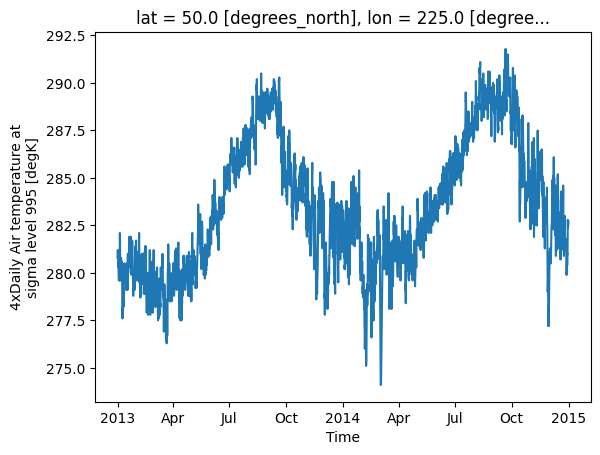

In [68]:
air.isel(lat=10, lon=10).plot()

Usually I prefer to specifically call the plotting method I think is appropriate for the data. You can find an overview of plot types integrated in Xarray [here](https://docs.xarray.dev/en/stable/api.html#plotting). Furthermore, all of these plotting methods are just wrappers to [Matplotlib](https://matplotlib.org/) methods. So this actually allows you to pass additional arguments to customize the plot:

Text(0.5, 1.0, 'Hello world!')

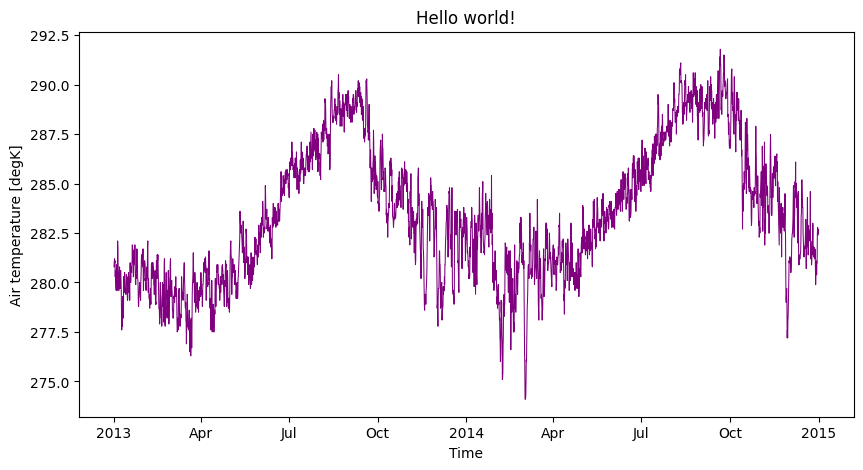

In [155]:
import matplotlib.pyplot as plt

air.isel(lat=10, lon=10).plot.line(figsize=(10, 5), color='purple', linewidth=.75)
plt.ylabel("Air temperature [degK]")
plt.title("Hello world!")

We can also plot spatial data like to 100th time step or the monthly means from earlier:

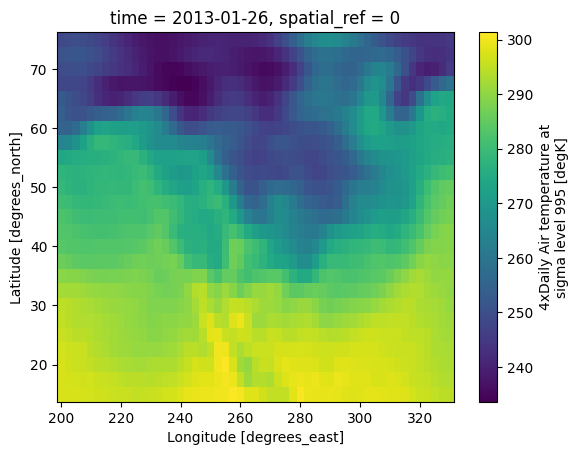

In [152]:
air.isel(time=100).plot()

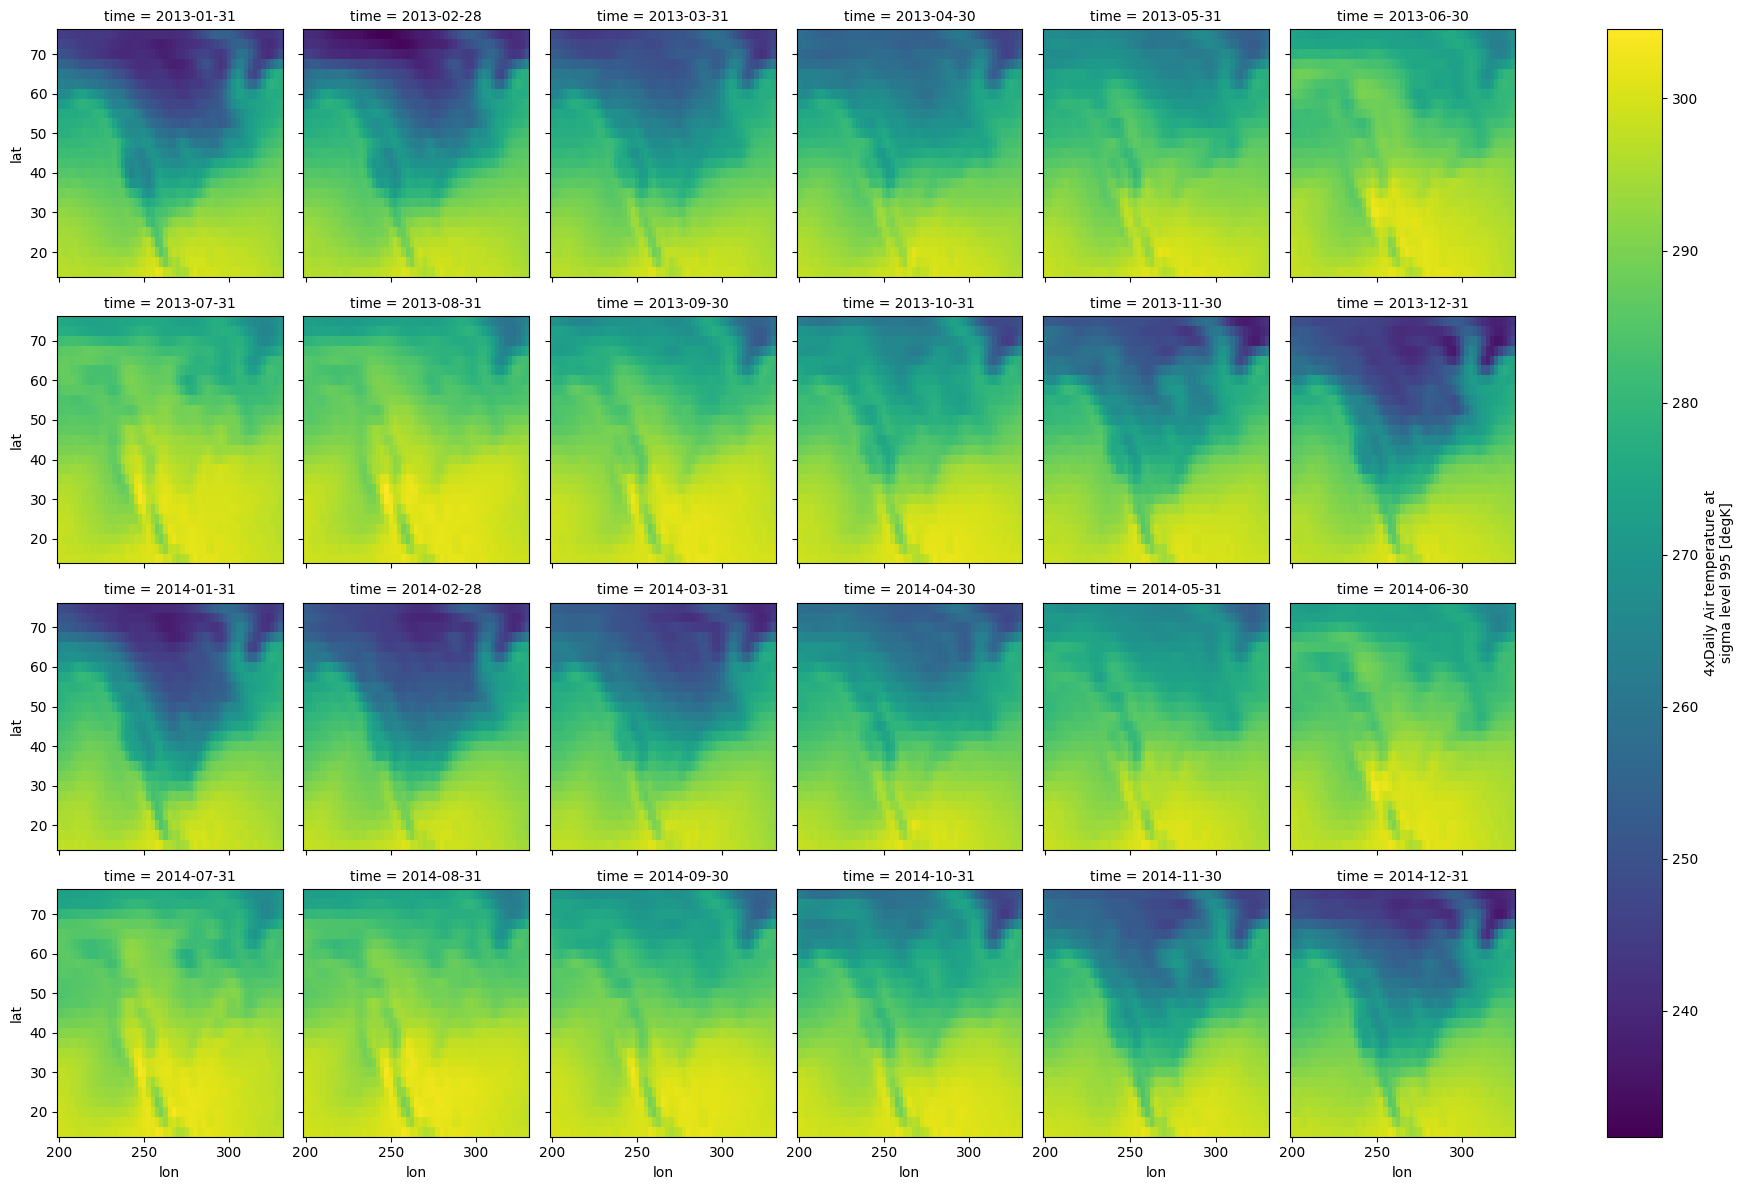

In [151]:
air.resample(time="1ME").mean().plot(col="time", col_wrap=6)

### 5-1 Bonus: Cartopy & hvPlot

Other libraries such as [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) and [hvPlot](https://hvplot.holoviz.org/) can handle Xarray objects and extend beyond the basic plotting capabilities of Xarray & Matplotlib. For example to plot spatial data on maps or to easily create interactive plots.

In [ ]:
!pip install cartopy

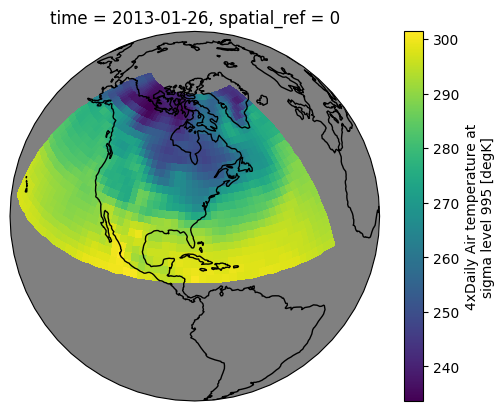

In [92]:
import cartopy.crs as ccrs

p = air.isel(time=100).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)

p.axes.set_global()
p.axes.coastlines()

In [ ]:
!pip install hvplot

In [136]:
import hvplot.xarray

air.isel(lat=10, lon=10).hvplot.line(width=1000, height=500) # size here is in pixels not in inches

:Curve   [time]   (4xDaily Air temperature at sigma level 995)

## 6 Additional resources

You can find several tutorials on different topics and for different levels on the [**Xarray tutorial**](https://tutorial.xarray.dev/intro.html) website. The [Xarray in 45 minutes](https://tutorial.xarray.dev/overview/xarray-in-45-min.html) tutorial could be a great next step after this short introduction as it also uses the air temperature dataset.

The [**Pythia Foundations Book**](https://foundations.projectpythia.org/landing-page.html) provides great tutorials on core scientific Python packages, including Xarray!


